CMSC320 Final Tutorial
# Penguins, Penguins, and Penguins
Sharon Zheng and Meisheng Liu

## Introduction
In this tutorial, we would like to see if we are able to classify a Penguin's species and sex through data collected from the penguin's such as the length of their flippers, bill(their beak), and body mass.
 
The dataset that we're using is the Palmer Penguin's dataset created by Allison Horst, Alison Hill, and Kristen Gorman. This dataset is made publicly available as a R default dataset as a feasible alternative to the Iris dataset for data visualization and analysis since the Iris dataset is used by many others for data visualization and analysis.

<br>

There are three types of penguins in this dataset: Adelie, Gentoo, and Chinstrap. There are also three major islands where the penguins are observed to be living at in Palmer Archipelago, Antarctica: Torgersen, Biscoe, and Dream island. We will give a brief background on each of them.  
 
Adelie penguins got their name from the wife of a French explorer in 1830 named Adèlie. Adelie penguins usually inhabit rocky beaches along the coastline of Antarctica and offshore islands. They are migratory animals that are found on large ice platforms on coastal areas during winter. When breeding season comes, the penguins would start moving towards the seashore to look for ice-free areas, and that's where they'll construct their nests. Krill, silverfish, squid, and crustaceans are the major diets for Adelie penguins.
 
Gentoo penguins live in ice-free areas such as flat, rocky beaches and low-lying cliffs in order to perform large gatherings between individuals. Just like Adelie penguins, Gentoo penguins primarily feed on crustaceans, squid and fish. Gentoo penguins usually mate with the same partner every year, and unlike other penguin species, Gentoo penguins breed two children a year as opposed to one.

Chinstrap penguins usually live on large icebergs in the ocean with large colonies, they are also the most numerous penguins in the world. Chinstrap penguins primarily feed on krill, fish, crustaceans, and small shoaling animals. They are fast swimmers, swimming around 30 kph (18 mph). They can also "fly" using their flippers just like other penguins, and can go at a speed of 20 miles per hour.

Torgersen Island is an island that is roughly circular and about 400m across in diameter. This island slopes upward and also has a rocky shoreline. A variety of mosses and two flowering plants in Antarctica grow on Torgersen Island as well. 
 
Dream Island is an island located to the south-east of Cape Monaco. It contains beautiful natural features such as a cave, and even a small waterfall and grasses during the summer.
 
Biscoe island, unlike the other two, is a series of islands, lying parallel to the west coast of Graham Land. These islands are named after John Biscoe, a British commander who explored these islands in 1832.

<br> 

Since these three species are closely related to each other, they all look very similar to each other, have similar diets, and live in similar habitats. Therefore we would like to see if there are any differences in their characteristics such as bills and flippers, and if we could identify which species it is by looking at the difference in their body mass, bills, flippers. Additionally we would also like to see if it is possible for us to identify the penguin's sex for each species.
 
<br>

**Libraries and Packages that we used:**

Palmerpenguins: the package that includes data for Palmer Penguins

Pandas: Used to create a dataframe where all our data can be accessed

Matplotlib: Used to create scatter plots

Numpy: Used to create regression lines for the scatter plots

Seaborn: Used to create plots for data visualization and analysis

## Data Collection and Data Cleaning

Here, we are using the palmerpenguins dataset created by Allison Horst, Alison Hill, and Kristen Gorman. It is originally provided as an R package, but we also found that it is availible as a python package after some exploration. We also import some libraries and packages that will be used to assist us in data exploration, data visualization and machine learning here.




In [ ]:
!pip install palmerpenguins
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins

After loading the dataset into a dataframe, we can see that there are some NaN values. We examined the dataset and decided to drop the rows that contains a NaN value, since there are only a few of those and we still have a viable set of data to work with. 

In [ ]:
penguins = load_penguins()
pd.set_option('display.max_rows', None)
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


## Exploratory Analysis and Data Visualization
### Exploring the Spread and Frequency of the Penguins Among the Islands

First, let's see how the three penguin species are spread across the three islands by using a simple strip plot. The three penguin species are color coded, and we can see that Adelie penguins are found in all three islands. Gentoo penguins are concentrated in Biscoe island, while Chinstrap penguins are concentrated in Dream island.

[Text(0, 0.5, 'Species'),
 Text(0.5, 0, 'Island'),
 Text(0.5, 1.0, 'Species across Islands')]

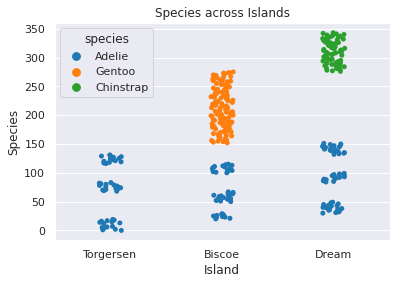

In [ ]:
stripplot = sns.stripplot(data=penguins, x="island", y=penguins.index, hue="species", jitter=True)
stripplot.set(xlabel = 'Island', ylabel = 'Species', title = 'Species across Islands')

Then, we will also like to check the number of each species in the dataset and if the number of males and females are roughly even.

[Text(0.5, 1.0, 'Number of Penguins for each Species')]

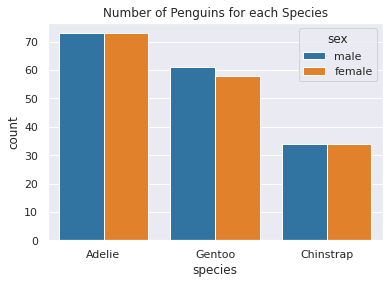

In [ ]:
countplot = sns.countplot(data=penguins, x='species', hue='sex')
countplot.set(title = 'Number of Penguins for each Species')

We can see from the chart that the *Adelie* penguins are the most common penguin species, *Gentoo* penguins are the next, and *Chinstrap* penguins are the least common penguin species. This information can be used as a factor to distinguish a penguin's species initially, and can be used for further analyzation to have a more accurate prediction of the species of a penguin.  We can also see that the male to female ratio is approximately 1:1 for all species.

### Exploring the Features of different Penguin Species

Now that we have a general picture of the three penguin species in the three islands, we will explore if there are any relationships between each type of their feature and their species. Analyzing their features will help us distinguish these species better. 

We used boxplots as a way to see the differences between the three species, Adelie, Gentoo, and Chinstrap clearly.
We plotted each features separately for a prominent distinguishment.


[Text(0, 0.5, 'Body Mass'),
 Text(0.5, 0, 'Species'),
 Text(0.5, 1.0, 'Species vs. Body Mass')]

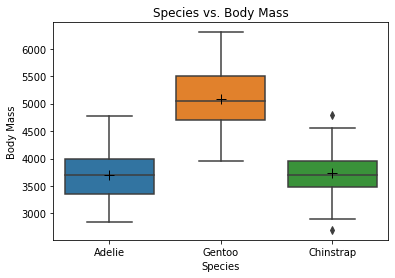

In [ ]:
specie_column = penguins.loc[:,'species']
spe = specie_column.values

body_mass_column = penguins.loc[:,'body_mass_g']
bod = body_mass_column.values

box_plot = sns.boxplot(x = spe, y = bod, showmeans = True, meanprops = {"marker": "+", "markeredgecolor": "black",
                       "markersize": "10"})
box_plot.set(xlabel = 'Species', ylabel = 'Body Mass', title = 'Species vs. Body Mass')

This box plot illustrates the distribution of body mass between each penguin species. According to the plot, we can see that Gentoo penguins have a higher overall body mass than Adelie and Chinstrap penguins. There are no major difference between the body mass in Adelie and Chinstrap penguins other than that Adelie penguins appear to have slightly higher overall body mass than Chinstrap penguins.

[Text(0, 0.5, 'Flipper Length'),
 Text(0.5, 0, 'Species'),
 Text(0.5, 1.0, 'Species vs. Flipper Length')]

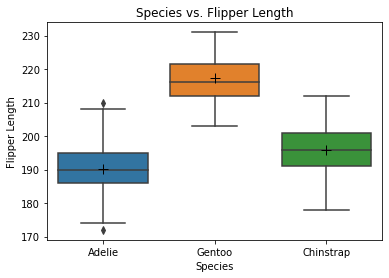

In [ ]:
flipper_column = penguins.loc[:,'flipper_length_mm']
flip = flipper_column.values

box_plot = sns.boxplot(x = spe, y = flip, showmeans = True, meanprops = {"marker": "+", "markeredgecolor": "black",
                       "markersize": "10"})
box_plot.set(xlabel = 'Species', ylabel = 'Flipper Length', title = 'Species vs. Flipper Length')

Here the box plot illustrates the flipper length between each penguin species, we can see that Gentoo penguins still have a higher overall flipper length than Adelie and Chinstrap penguins, just like the distribution with the body mass. However in this plot also shows that Chinstrap penguins have slightly higher overall flipper lengths than Adelie penguins.

[Text(0, 0.5, 'Bill Length'),
 Text(0.5, 0, 'Species'),
 Text(0.5, 1.0, 'Species vs. Bill Length')]

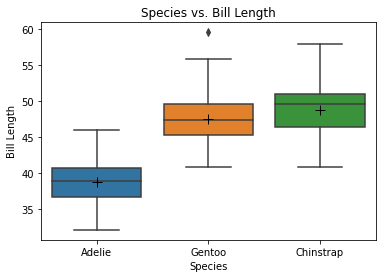

In [ ]:
bill_column = penguins.loc[:,'bill_length_mm']
bill = bill_column.values

box_plot = sns.boxplot(x = spe, y = bill, showmeans = True, meanprops = {"marker": "+", "markeredgecolor": "black",
                       "markersize": "10"})
box_plot.set(xlabel = 'Species', ylabel = 'Bill Length', title = 'Species vs. Bill Length')

This box plot shows the Bill length between each penguin species. The major difference between this plot and the ones above is that Chinstrap penguins appears to have a higher overall bill length than the other two. On the other hand Adelie penguins have the lowest average bill length between the three species.

[Text(0, 0.5, 'Bill Depth'),
 Text(0.5, 0, 'Species'),
 Text(0.5, 1.0, 'Species vs. Bill Depth')]

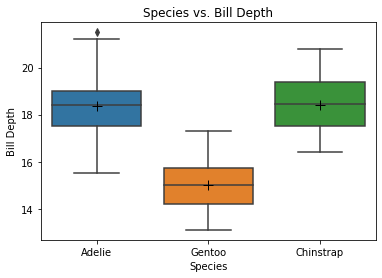

In [ ]:
bill_d_column = penguins.loc[:,'bill_depth_mm']
bill_d = bill_d_column.values

box_plot = sns.boxplot(x = spe, y = bill_d, showmeans = True, meanprops = {"marker": "+", "markeredgecolor": "black",
                       "markersize": "10"})
box_plot.set(xlabel = 'Species', ylabel = 'Bill Depth', title = 'Species vs. Bill Depth')

This box plot shows the bill depth between each penguin species. We can see that Gentoo penguins have the lowest average bill depth among all three species, Adelie penguins and Chinstrap penguins have roughly the same distribution in terms of bill depth.

##### Bill Depth vs. Bill Length
We realized there may also be a relationship between bill depth vs. bill length, and that this ratio can probably provide an additional way/factor for us to distinguish the penguin species. So we plotted them out using scatter plots.

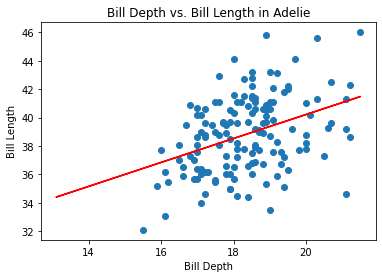

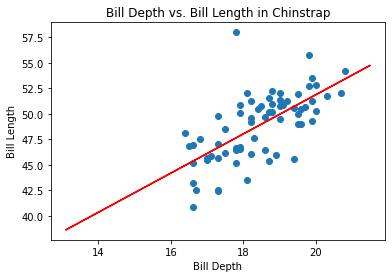

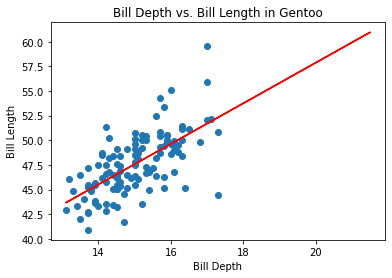

In [ ]:
for index, col in penguins.groupby(['species']):
  bill_depth_array = col['bill_depth_mm']
  bill_length_array = col['bill_length_mm']
  fig, ax = plt.subplots()
  ax.scatter(bill_depth_array, bill_length_array)
  ax.set_xlabel('Bill Depth')
  ax.set_ylabel('Bill Length')
  ax.set_title(f'Bill Depth vs. Bill Length in {index}')

  x, y = np.polyfit(bill_depth_array, bill_length_array, 1)
  ax.plot(penguins['bill_depth_mm'], penguins['bill_depth_mm'] * x + y, color = 'red')


These three scatter plots shows the bill depth compared to bill length for each species. We did a regression line on these three plots and observed that there is a positive correlation between the bill depth and bill length, meaning that the higher the bill length the higher the bill depth. We will have a combined scatter plot below that shows all three species distribution in one plot.

[Text(0, 0.5, 'Bill Length'),
 Text(0.5, 0, 'Bill Depth'),
 Text(0.5, 1.0, 'Bill Length vs. Bill Depth across different Species')]

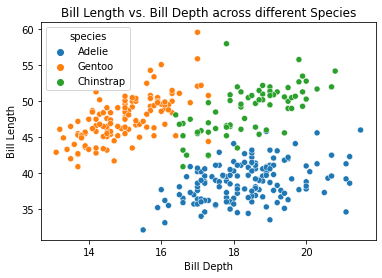

In [ ]:
scatter_plot = sns.scatterplot(data = penguins, x = "bill_depth_mm", y = "bill_length_mm", hue = "species")
scatter_plot.set(xlabel = 'Bill Depth', ylabel = 'Bill Length', title = 'Bill Length vs. Bill Depth across different Species')

This scatter plot shows the bill depth compared to bill length across all three species. In this plot we can observe more clearly that Gentoo penguins generally have lower bill depth than Chinstrap and Adelie penguins. Adelie penguins have the lowest bill length but tend to have a overall higher bill depth. Chinstrap penguins have higher bill length than adelie penguins, which is roughly similar to Gentoo penguins, but they also have similar bill depth distribution with adelie penguins. 

##### Male vs. Female

We also futher explored the difference between male and female body masses among different species and could clearly see that there is a significant difference which can aid us in distinguishing the sex of a penguin withn a species of penguin.

[Text(0, 0.5, 'Body Mass'),
 Text(0.5, 0, 'Sex'),
 Text(0.5, 1.0, 'Sex vs. Body Mass for Adelie Penguins')]

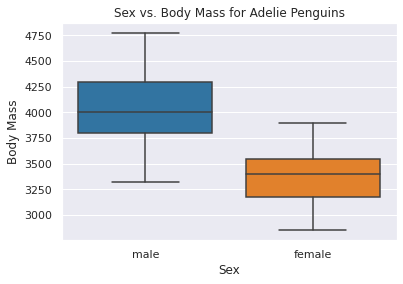

In [ ]:
adelie = penguins.loc[penguins['species'] == "Adelie"]
box_plot = sns.boxplot(data=adelie, x = 'sex', y = 'body_mass_g', order = ['male', 'female'])
box_plot.set(xlabel = 'Sex', ylabel = 'Body Mass', title = 'Sex vs. Body Mass for Adelie Penguins')


This box plot shows the body mass distribution for male and female Adelie penguins. According to the plot, we can see that male Adelie penguins tend to have a much higher body mass than female Adelie penguins.

[Text(0, 0.5, 'Body Mass'),
 Text(0.5, 0, 'Sex'),
 Text(0.5, 1.0, 'Sex vs. Body Mass for Gentoo Penguins')]

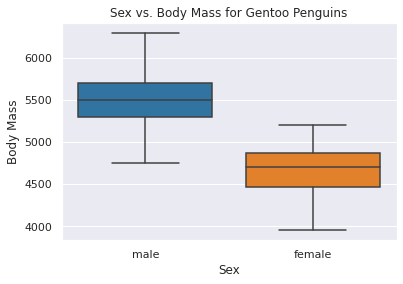

In [ ]:
gentoo = penguins.loc[penguins['species'] == "Gentoo"]
box_plot = sns.boxplot(data=gentoo, x = 'sex', y = 'body_mass_g', order = ['male', 'female'])
box_plot.set(xlabel = 'Sex', ylabel = 'Body Mass', title = 'Sex vs. Body Mass for Gentoo Penguins')


This box plot shows the body mass distribution for male and female Gentoo penguins. Just like what we observed for Adelie penguins, we can see that male Gentoo penguins also tend to have a much higher body mass than female Gentoo penguins.

[Text(0, 0.5, 'Body Mass'),
 Text(0.5, 0, 'Sex'),
 Text(0.5, 1.0, 'Sex vs. Body Mass for Chinstrap Penguins')]

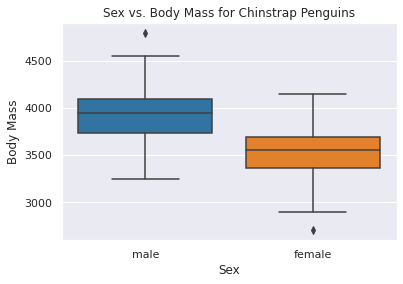

In [ ]:
chinstrap = penguins.loc[penguins['species'] == "Chinstrap"]
box_plot = sns.boxplot(data=chinstrap, x = 'sex', y = 'body_mass_g', order = ['male', 'female'])
box_plot.set(xlabel = 'Sex', ylabel = 'Body Mass', title = 'Sex vs. Body Mass for Chinstrap Penguins')

This last box plot on body mass shows the body mass distribution for male and female Chinstrap penguins. Although male Chinstrap penguins appear to have higher body mass than female Chinstrap penguins as well, the difference between body mass of male and female Chinstrap penguins is significantly smaller than Adelie and Gentoo penguins.


## Machine Learning and Analysis

In this portion we will use a machine learning model created with a decision tree classifier to classify our data. We would like to show that the penguin species can be classified effectively using the characteristic measurements provided in the dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

penguin_data = load_penguins(return_X_y = True)

x = penguin_data[0]
y = penguin_data[1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 100, random_state = 0)

clf = DecisionTreeClassifier()
x_train = x_train.fillna(x_train.mean())
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(clf.score(x_test, y_test))

              precision    recall  f1-score   support

      Adelie       0.94      0.98      0.96        48
   Chinstrap       0.94      0.85      0.89        20
      Gentoo       1.00      1.00      1.00        32

    accuracy                           0.96       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.96      0.96      0.96       100

[[47  1  0]
 [ 3 17  0]
 [ 0  0 32]]
0.96


The code above illustrates a machine learning model that uses the data from the penguins dataset to predict and classify a penguin's species from its data(bill length, bill depth, flipper length etc.). According to the resulting confusion matrix and score, we can see that this model has done a pretty good job in correctly predicting the species of each penguin.

## Conclusion

Throughout this tutorial, we can see that each penguin has their unique characteristics and it is distinguishable just by observing these characteristics. As an example, Adelie penguins have a large bill depth, small bill length, small flipper length, and small body mass. Gentoo penguins in contrast have smaller bill depth, longer bill length, longer flipper length, and larger body mass. It is also easy to tell if a penguin is male or female by their body mass measurement, combining with other measurements we can identify a penguin's sex and species.
Why is it important to study penguins and explore ways to distinguish penguin species like we did in this tutorial? It is important because by studying penguins through these data, we can understand their biology, population dynamics, habitats, and their role within the Antarctic ecosystem as well as within the world. As global warming worsens, it is even more important to study living creatures like penguins in Antarctica. Here are some more resources that we found interesting and useful to better understand Antarctica and the penguins living there:

https://www.coolantarctica.com/Antarctica%20fact%20file/wildlife/antarctic-penguins.php

https://www.europeanpolarboard.org/fileadmin/news/FINAL_EPB_SCAR_Biology_panel_summary.pdf